In [1]:
import numpy as np 
import pandas as pd  
from sklearn.decomposition import PCA 
  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
from sklearn import datasets

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
data1=pd.DataFrame(digits.data)

In [6]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [8]:
digits.data.shape

(1797, 64)

In [9]:
digits.images.shape

(1797, 8, 8)

In [10]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

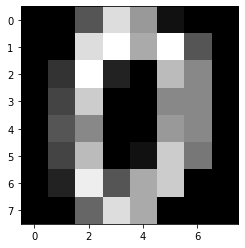

In [11]:
plt.imshow(digits.images[0], cmap=plt.cm.gray)

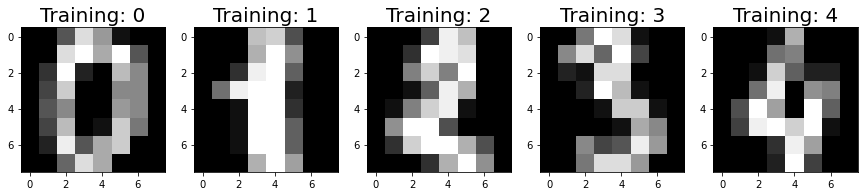

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f"Training: {label}", fontsize=20 )  

In [13]:
x=digits.data
y=digits.target

In [14]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [15]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
x.shape

(1797, 64)

In [17]:
y.shape

(1797,)

In [18]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

In [19]:
X_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [20]:
X_std.shape

(1797, 64)

In [21]:
x1=X_std.T
x1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

In [22]:
x1.shape

(64, 1797)

In [23]:
cov_mat = np.cov(X_std.T)
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [24]:
#3. Extract only features and scale the data using StandardScaler() , compute min covariance?
#A. -0.5705
#B. -1
#C. 0.1
#D. None of the above
#Answer)A. -0.5705
cov_mat.min()

-0.5705136332381109

In [25]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)#

In [26]:
#4. Extract only features and scale the data using StandardScaler() , how many eigen_values will be calculated?
#A. 1
#B. 64
#C. 1797
#D. 0
#Answer)B. 64
eig_vals.shape

(64,)

In [27]:
# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
var_exp

[12.03391609773488,
 9.561054403097902,
 8.444414892624547,
 6.498407907524167,
 4.860154875966418,
 4.214119869271952,
 3.9420828035673905,
 3.389380924638305,
 2.998221011625238,
 2.9320025512522037,
 2.781805463550328,
 2.5770550925819884,
 2.2753033157642566,
 2.227179739514352,
 2.1652294318492378,
 1.914166606442141,
 1.7755470851681912,
 1.63806927428441,
 1.5964601688623348,
 1.4891911870878178,
 1.347969565817945,
 1.2719313702347623,
 1.165837350591951,
 1.05764659853632,
 0.9753159471981107,
 0.9445589897320007,
 0.8630138269707235,
 0.8366428536685085,
 0.7976932484112399,
 0.7464713709260635,
 0.7255821513702743,
 0.6919112454811823,
 0.6539085355726144,
 0.6407925738459865,
 0.5913841117223421,
 0.5711624052235258,
 0.5236368034166361,
 0.48180758644514293,
 0.4537192598584495,
 0.42316275323278035,
 0.40605306997903584,
 0.3970848082758268,
 0.35649330314261657,
 0.34078718147030035,
 0.3278353352879566,
 0.31103200734535513,
 0.2885752941089327,
 0.27648926352354536,
 0

In [28]:
#5. from the above eigenvalues and eigenvectors, create eigenpair and calculate maximum cumulative explained variance?
#A. 100
#B. 90
#C. 80
#D. 69
#Answer)A. 100
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

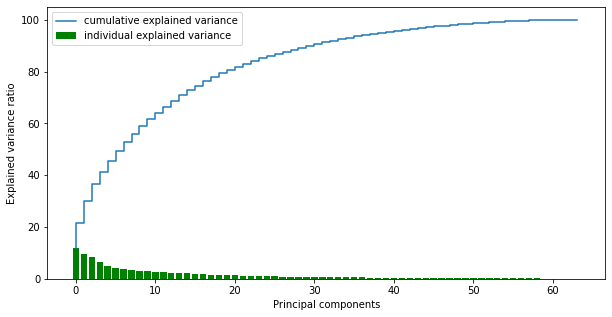

In [29]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [77]:
#With the above PCA data your decision tree model with train test ratio as 80:20, and random_state=40 .
#11. With the help of the above model how many images have been misclassified by the model.
#A. 40-50
#B. 60-70
#C. 50-60
#D. 70-80
x_train,x_test,y_train,y_test=train_test_split(X_std,y, train_size=0.8,random_state=40)

In [59]:
#7. from the below plot, select the range of components can be selected?
#A. 0-10
#B. 10-20
#C. 40-60
#D. 30-40
#Answer)B. 10-20
#pca = PCA(n_components=20)
#pca_x_train = pca.fit_transform(x_train)
#pca_x_test = pca.transform(x_test)

In [78]:
rf=DecisionTreeClassifier().fit(x_train,y_train)    #(pca_x_train,y_train)

In [79]:
predicted=rf.predict(x_test)   #(pca_x_test)

In [80]:
predicted

array([8, 1, 9, 0, 3, 3, 2, 7, 9, 9, 0, 4, 0, 6, 4, 6, 7, 3, 5, 0, 1, 8,
       5, 2, 0, 6, 4, 1, 7, 5, 5, 8, 4, 2, 6, 1, 7, 9, 7, 5, 5, 9, 8, 4,
       2, 2, 8, 5, 0, 0, 1, 9, 1, 9, 1, 2, 6, 4, 5, 1, 8, 4, 7, 0, 7, 6,
       3, 9, 4, 4, 3, 2, 7, 4, 7, 6, 2, 9, 5, 4, 1, 8, 9, 1, 3, 4, 3, 4,
       3, 1, 2, 5, 0, 0, 7, 1, 9, 6, 7, 0, 8, 2, 5, 1, 2, 5, 2, 9, 1, 1,
       4, 4, 4, 1, 9, 6, 6, 8, 6, 7, 1, 8, 8, 3, 7, 6, 2, 1, 1, 2, 9, 2,
       4, 9, 9, 3, 7, 3, 6, 9, 8, 6, 2, 4, 3, 8, 0, 4, 4, 7, 3, 2, 7, 3,
       7, 6, 2, 2, 9, 7, 2, 6, 6, 5, 2, 2, 8, 1, 7, 4, 3, 8, 9, 4, 3, 7,
       6, 1, 1, 0, 4, 4, 8, 9, 4, 0, 0, 4, 3, 0, 7, 9, 0, 1, 0, 3, 0, 3,
       6, 9, 6, 8, 1, 0, 4, 8, 3, 4, 7, 2, 9, 9, 8, 8, 4, 1, 6, 5, 5, 1,
       1, 3, 9, 6, 2, 3, 6, 2, 6, 6, 8, 4, 1, 8, 9, 8, 6, 3, 2, 5, 1, 3,
       1, 0, 1, 0, 8, 1, 0, 6, 6, 9, 9, 4, 1, 5, 0, 9, 1, 9, 4, 7, 7, 8,
       1, 3, 7, 6, 9, 4, 2, 7, 8, 8, 5, 7, 7, 1, 5, 5, 3, 5, 9, 8, 5, 4,
       9, 0, 4, 7, 7, 3, 7, 6, 9, 6, 3, 2, 2, 0, 9,

In [81]:
accuracy_score(predicted,y_test)

0.8444444444444444

In [82]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [83]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [84]:
for i,a in enumerate([2,3,4,54]):
    print(i,a)

0 2
1 3
2 4
3 54


In [85]:
predicted

array([8, 1, 9, 0, 3, 3, 2, 7, 9, 9, 0, 4, 0, 6, 4, 6, 7, 3, 5, 0, 1, 8,
       5, 2, 0, 6, 4, 1, 7, 5, 5, 8, 4, 2, 6, 1, 7, 9, 7, 5, 5, 9, 8, 4,
       2, 2, 8, 5, 0, 0, 1, 9, 1, 9, 1, 2, 6, 4, 5, 1, 8, 4, 7, 0, 7, 6,
       3, 9, 4, 4, 3, 2, 7, 4, 7, 6, 2, 9, 5, 4, 1, 8, 9, 1, 3, 4, 3, 4,
       3, 1, 2, 5, 0, 0, 7, 1, 9, 6, 7, 0, 8, 2, 5, 1, 2, 5, 2, 9, 1, 1,
       4, 4, 4, 1, 9, 6, 6, 8, 6, 7, 1, 8, 8, 3, 7, 6, 2, 1, 1, 2, 9, 2,
       4, 9, 9, 3, 7, 3, 6, 9, 8, 6, 2, 4, 3, 8, 0, 4, 4, 7, 3, 2, 7, 3,
       7, 6, 2, 2, 9, 7, 2, 6, 6, 5, 2, 2, 8, 1, 7, 4, 3, 8, 9, 4, 3, 7,
       6, 1, 1, 0, 4, 4, 8, 9, 4, 0, 0, 4, 3, 0, 7, 9, 0, 1, 0, 3, 0, 3,
       6, 9, 6, 8, 1, 0, 4, 8, 3, 4, 7, 2, 9, 9, 8, 8, 4, 1, 6, 5, 5, 1,
       1, 3, 9, 6, 2, 3, 6, 2, 6, 6, 8, 4, 1, 8, 9, 8, 6, 3, 2, 5, 1, 3,
       1, 0, 1, 0, 8, 1, 0, 6, 6, 9, 9, 4, 1, 5, 0, 9, 1, 9, 4, 7, 7, 8,
       1, 3, 7, 6, 9, 4, 2, 7, 8, 8, 5, 7, 7, 1, 5, 5, 3, 5, 9, 8, 5, 4,
       9, 0, 4, 7, 7, 3, 7, 6, 9, 6, 3, 2, 2, 0, 9,

In [86]:
y_test

array([8, 1, 9, 0, 3, 3, 2, 7, 3, 9, 0, 4, 0, 6, 7, 6, 7, 3, 5, 0, 1, 8,
       5, 2, 0, 6, 4, 1, 7, 5, 5, 8, 4, 2, 6, 4, 8, 9, 7, 5, 5, 9, 8, 4,
       2, 2, 3, 5, 0, 0, 1, 9, 1, 9, 1, 2, 6, 4, 5, 1, 8, 4, 8, 0, 7, 6,
       3, 9, 4, 4, 3, 2, 7, 4, 7, 6, 2, 9, 5, 4, 1, 8, 9, 1, 2, 4, 3, 4,
       3, 1, 2, 5, 0, 0, 7, 1, 1, 6, 7, 0, 8, 2, 5, 1, 1, 5, 2, 1, 2, 1,
       4, 4, 4, 8, 9, 6, 6, 3, 6, 4, 1, 8, 8, 3, 7, 6, 2, 1, 1, 2, 9, 8,
       4, 9, 9, 3, 7, 7, 6, 9, 1, 6, 2, 4, 5, 8, 0, 5, 4, 4, 3, 2, 7, 9,
       7, 6, 2, 2, 9, 7, 2, 6, 6, 5, 2, 1, 8, 1, 7, 4, 3, 8, 9, 4, 1, 7,
       6, 1, 1, 0, 4, 4, 8, 1, 4, 0, 0, 7, 3, 0, 7, 9, 0, 1, 0, 3, 0, 9,
       6, 9, 6, 8, 1, 0, 1, 8, 3, 4, 7, 8, 9, 9, 8, 8, 4, 1, 6, 5, 5, 1,
       1, 3, 9, 6, 2, 3, 6, 2, 6, 6, 8, 4, 1, 8, 9, 8, 6, 3, 2, 5, 1, 3,
       2, 0, 1, 0, 8, 1, 9, 6, 6, 9, 9, 4, 3, 6, 0, 9, 1, 9, 4, 7, 7, 8,
       1, 3, 7, 6, 9, 4, 2, 7, 7, 8, 5, 7, 7, 1, 5, 3, 3, 5, 9, 8, 5, 4,
       9, 0, 4, 8, 7, 3, 7, 6, 8, 6, 8, 2, 2, 0, 8,

In [87]:
y_test.shape

(360,)

In [88]:
def get_misclassified_index(y_pred,y_test):
    misclassification=[]
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
            
    return misclassification

In [89]:
misclassification = get_misclassified_index(predicted,y_test)

In [90]:
misclassification[:] #[:] 

[8,
 14,
 35,
 36,
 46,
 62,
 84,
 96,
 104,
 107,
 108,
 113,
 117,
 119,
 131,
 137,
 140,
 144,
 147,
 149,
 153,
 165,
 174,
 183,
 187,
 197,
 204,
 209,
 242,
 248,
 254,
 255,
 272,
 279,
 289,
 294,
 296,
 300,
 304,
 305,
 310,
 311,
 312,
 314,
 318,
 319,
 326,
 327,
 331,
 333,
 335,
 336,
 343,
 346,
 352,
 359]

In [91]:
#11. With the help of the above model how many images have been misclassified by the model.
#A. 40-50
#B. 60-70
#C. 50-60
#D. 70-80
len(misclassification)

56

In [73]:
def plot_misclassifications(misclassification):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(pca_x_test[wrong],(5,4)),cmap=plt.cm.gray)
        plt.title("Predicted:{} Actual:{}".format(predicted[wrong],y_test[wrong]))

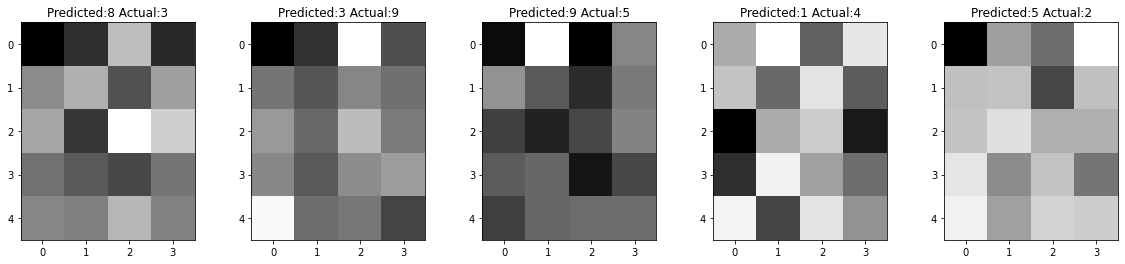

In [74]:
plot_misclassifications(misclassification)